In [12]:
#importing necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [13]:
import codecs

codecs.register_error('strict', codecs.lookup_error('surrogateescape'))

In [14]:
# Loading the dataset
data = pd.read_csv("/content/sample_data/Language Detection.csv")

In [ ]:
# value count for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [15]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [16]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
# creating a list for appending the preprocessed text
data_list = []

In [18]:
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [19]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [20]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [21]:
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [22]:
# prediction 
y_pred = model.predict(x_test)

In [23]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
ac
#cm

0.9748549323017408

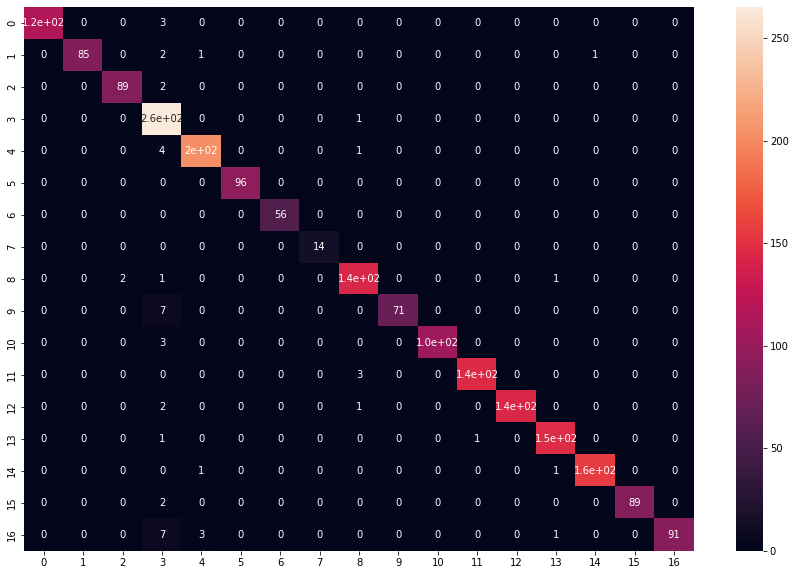

In [24]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [25]:
# function for predicting language
def prediction(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    #for i in lang:return i
    return lang[0]
print("The language is in",prediction("hello, ب التحليلا"))
print("The language is in",prediction("तुम क्या कर रहे हो?"))
print("The language is in",prediction("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി"))
print("The language is in",prediction("fournit un portail de connaissances basé sur la communauté"))
print("The language is in",prediction("proporciona un portal de conocimiento basado en la comunidad para profesionale"))

The language is in English
The language is in Hindi
The language is in Malayalam
The language is in French
The language is in Spanish


In [ ]:
# English
print(prediction("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals"))
# French
print(prediction("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données"))
# Arabic
print(prediction("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمعوعلوم البيانات لمحترفي التحليلات "))
# Spanish
print(prediction("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science."))
# Malayalam
print(prediction("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു"))
# Russian
print(prediction("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных."))

English
French
Arabic
Spanish
Malayalam
Russian


In [ ]:
''''with open('/content/testtxt.txt') as f:
    contents = f.read()
print(prediction(contents))'''
with open('/content/testtxt.txt') as f:
    lines = [line.rstrip() for line in f]
#print(lines)
for i in lines :
  print(prediction(i))



FileNotFoundError: ignored

In [ ]:
def readFromFile(file):
  '''l=[]
  for line in file:
  #count+=1
    l.append(line)
    l.append(prediction(line.strip()))
    break
  file.close()
  #|print(readFile("/content/testtxt.txt"))
  #print(l)
  return l'''
  with open(file) as f:
    lines = [line.rstrip() for line in f]
  #print(lines)
  l=[]
  for i in lines : l.append(prediction(i))
  return l
#print(readFromFile("/content/testtxt.txt","r"))
file = "/content/testtxt.txt"
print(readFromFile(file))
#print(*x)


FileNotFoundError: ignored

In [ ]:
import pickle
pkl_filename = 'Language_detection.pkl'
with open(pkl_filename,'wb') as file:
  pickle.dump(model,file)


In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_KERNEL_FUNCTIONS
with open(pkl_filename,'rb') as file:
  pickle_model = pickle.load(file)

In [ ]:
score = pickle_model.score(x_test,y_test)
print("Test score: {0:.2f} %".format(100*score))
Ypredict = pickle_model.predict(x_test)

Test score: 98.02 %


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.0 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 106 kB 42.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 213 kB 47.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 278 kB 47.5 MB/s 
     |████████████████████████████████| 2.3 MB 48.8 MB/s 
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 68 kB 5.2 MB/s 
     |████████████████████████████████| 68 kB 6.1 M

In [ ]:
import gradio as gr

In [ ]:
outputs =gr.outputs.Textbox()
app =  gr.Interface(fn = prediction , inputs="text", outputs=outputs)
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
pickle.dump(model, open("Language_detection.pkl", 'wb'))

In [ ]:
doutputs =gr.outputs.Textbox()
app =  gr.Interface(fn = readFromFile , inputs="file", outputs=outputs)
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
app =  gr.Interface(fn = get_output, inputs="textbox", outputs=gr.outputs.Textbox())
app.launch()

NameError: ignored

In [ ]:
!pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 4.5 MB/s 
     |████████████████████████████████| 237 kB 39.8 MB/s 
     |████████████████████████████████| 182 kB 41.1 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 4.7 MB 49.5 MB/s 
     |████████████████████████████████| 164 kB 47.8 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=b200ccb42748db7d03e6008cf533892ad54b91422beba2a814a2ff6c1805446b
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
import streamlit as st

In [ ]:
from io import StringIO

In [ ]:
%%writefile app.py
file = st.file_uploader("Please choose a file")
if file is not None:
  stringio = StringIO(file.getvalue().decode("utf-8"))
  string_data = stringio.read()

  st.write(prediction(string_data))

Writing app.py


In [ ]:
!ls


 app.py   'Language Detection.csv'   sample_data
 flagged   Language_detection.pkl    testtxt.txt


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 5.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=9cd79218a24a26598dcc398859002adb1aa0428725eaa7685facd2add7441530
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2I7nfoEqwwwWnnGpn6UjmltOH3b_54EGW887UjrQ4Y9Yzcxn5

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!pgrep streamlit

561


In [ ]:
publ_url=ngrok.connect(port='8501')

INFO:pyngrok.ngrok:Opening tunnel named: http-80-e02e38a9-405b-4f5a-8a08-e864ec48498f
2022-11-27 09:52:27.257 Opening tunnel named: http-80-e02e38a9-405b-4f5a-8a08-e864ec48498f
INFO:pyngrok.process.ngrok:t=2022-11-27T09:52:27+0000 lvl=info msg="no configuration paths supplied"
2022-11-27 09:52:27.357 t=2022-11-27T09:52:27+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-11-27T09:52:27+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-11-27 09:52:27.363 t=2022-11-27T09:52:27+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-11-27T09:52:27+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-11-27 09:52:27.367 t=2022-11-27T09:52:27+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2022-11-27T09:52:27+0000 lvl=info msg="starting web service" obj=web addr

In [ ]:
publ_url

<NgrokTunnel: "http://baae-35-225-185-79.ngrok.io" -> "http://localhost:80">